In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sort_dataframeby_monthorweek as sd

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


## Data preprocessing

In [3]:
# Nan Values check
df.isnull().values.any()

True

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### We can fill all the NaN values with 0
- Children nan values we are going to assume them in 0 children
- Agent, company and country like are not number values, so that we are going to assume them as private information, filling them with 0

In [5]:
conditions = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)
df[conditions]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


### With that filter we can erase illogical rows

In [6]:
data = df[conditions]

## Spatial Analysis

In [7]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

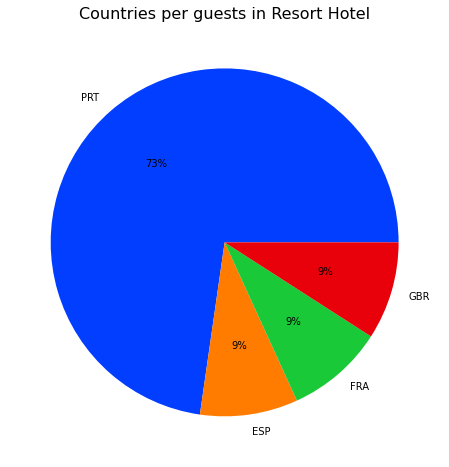

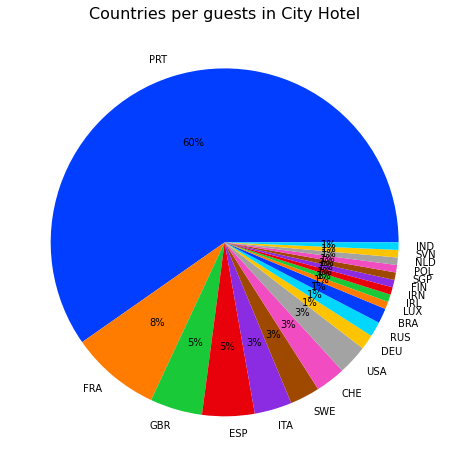

In [54]:
for i in data['hotel'].unique():
    hotel = data[(data['hotel'] == i) & (data['is_canceled'] == 0)]
    labels = hotel['country'].value_counts().index
    values = hotel['country'].value_counts()
    colors = sns.color_palette('bright')
    plt.figure(figsize=(12,8))
    plt.title('Countries per guests in {}'.format(i), fontsize=16)
    plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

In [9]:
country_data = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_data.columns = ['Country', 'Number of guest']
country_data

,Country,Number of guest
0,PRT,94
1,FRA,13
2,GBR,8
3,ESP,8
4,ITA,5
5,SWE,4
6,CHE,4
7,USA,4
8,DEU,2
9,RUS,2


In [10]:
px.choropleth(country_data, locations=country_data['Country'], color=country_data['Number of guest'],
              hover_name=country_data['Country'], title='Home country of guest')

## Booking price analysis

In [11]:
data_process = df[df['is_canceled'] == 0]
data_process.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


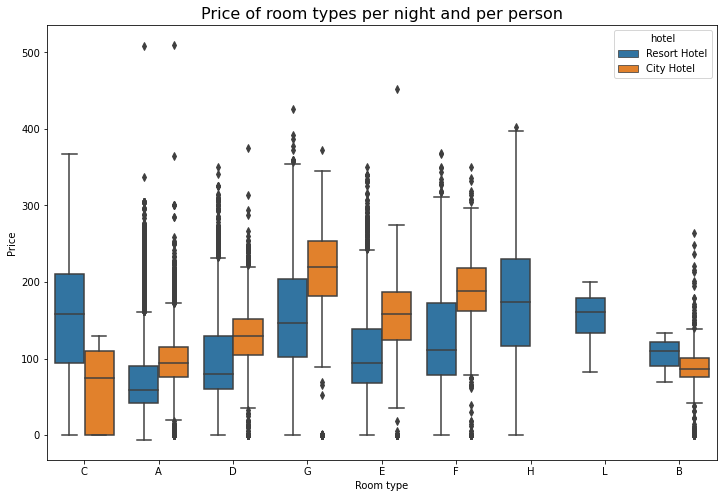

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data_process, x='reserved_room_type', y='adr', hue='hotel')
plt.title('Price of room types per night and per person', fontsize=16)
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

In [13]:
resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [14]:
resort_price_data = resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_price_data = city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [61]:
final = city_price_data.merge(resort_price_data, on='arrival_date_month')
final.columns = ['month', 'price for resort', 'price for city']
final

,month,price for resort,price for city
0,April,111.856824,75.867816
1,August,118.412083,181.205892
2,December,87.856764,68.322236
3,February,86.183025,54.147478
4,January,82.160634,48.708919
5,July,115.563810,150.122528
6,June,117.702075,107.921869
7,March,90.170722,57.012487
8,May,120.445842,76.657558
9,November,86.500456,48.681640


In [62]:
final = sd.Sort_Dataframeby_Month(final, 'month')
final

,month,price for resort,price for city
0,January,82.160634,48.708919
1,February,86.183025,54.147478
2,March,90.170722,57.012487
3,April,111.856824,75.867816
4,May,120.445842,76.657558
5,June,117.702075,107.921869
6,July,115.563810,150.122528
7,August,118.412083,181.205892
8,September,112.598452,96.416860
9,October,101.745956,61.727505


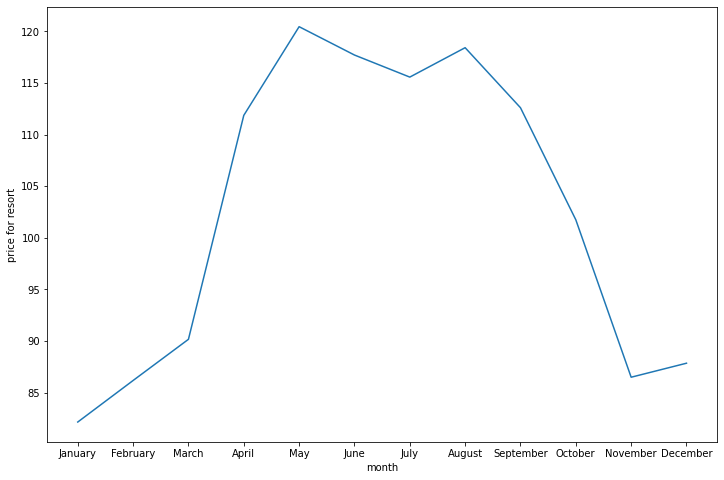

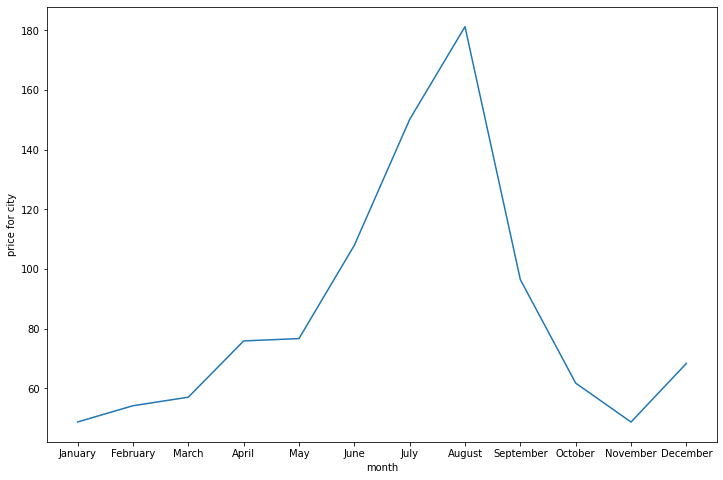

In [64]:
plt.figure(figsize=(12,8))
sns.lineplot(x = "month", y = 'price for resort', data = final)
plt.show()
plt.figure(figsize=(12,8))
sns.lineplot(x = "month", y = 'price for city', data = final)
plt.show()

## Analysing Preference of Guests

In [18]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.0,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.0,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,1/5/2016


<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

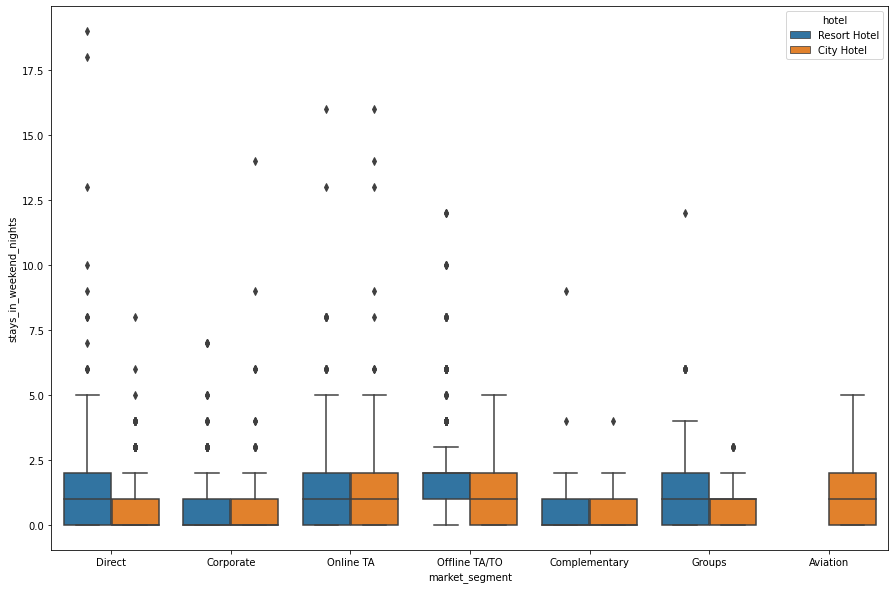

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', data=data_process, hue='hotel')

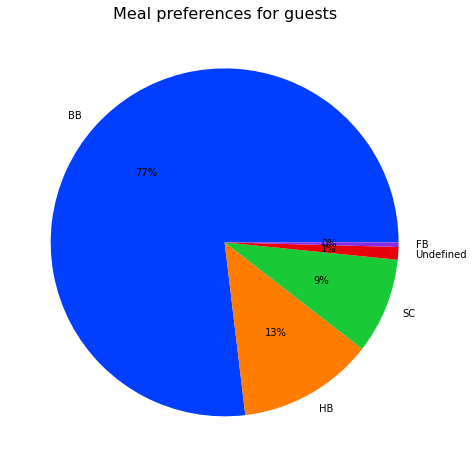

In [65]:
labels = data_process['meal'].value_counts().index
values = data_process['meal'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(12,8))
plt.title('Meal preferences for guests', fontsize=16)
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Analysing occupations by month

In [21]:
rush_resort = resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month', 'number of guests']
rush_resort

,month,number of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [22]:
rush_city = city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['month', 'number of guests']
rush_city

,month,number of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [23]:
final_rush = rush_city.merge(rush_resort, on='month')
final_rush.columns= ['month', 'number of guest in city', 'number of guest in resort']
final_rush

,month,number of guest in city,number of guest in resort
0,August,5381,3257
1,July,4782,3137
2,May,4579,2535
3,June,4366,2038
4,October,4337,2577
5,September,4290,2102
6,March,4072,2573
7,April,4015,2550
8,February,3064,2308
9,November,2696,1976


In [66]:
final = sd.Sort_Dataframeby_Month(final_rush, 'month')
final

,month,number of guest in city,number of guest in resort
0,January,2254,1868
1,February,3064,2308
2,March,4072,2573
3,April,4015,2550
4,May,4579,2535
5,June,4366,2038
6,July,4782,3137
7,August,5381,3257
8,September,4290,2102
9,October,4337,2577


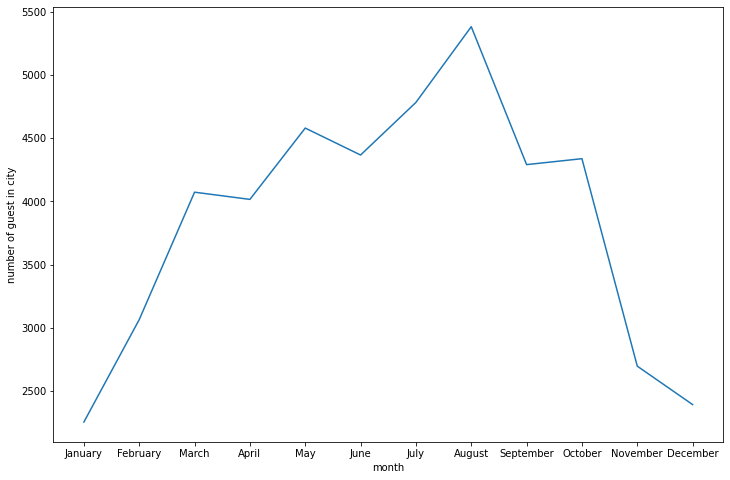

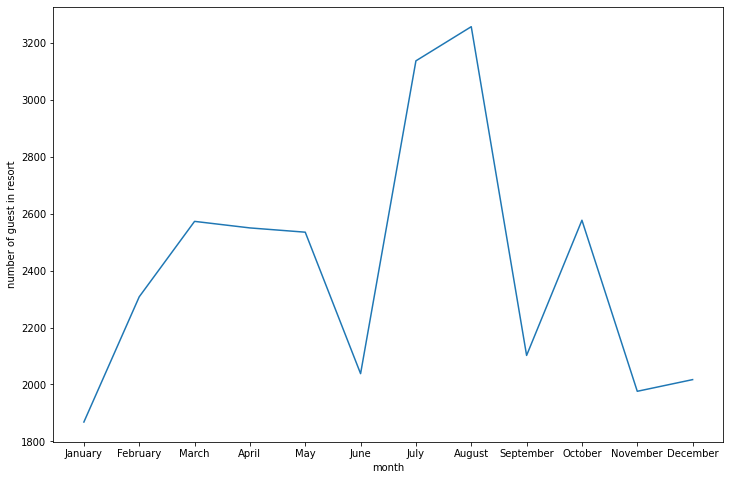

In [67]:
plt.figure(figsize=(12,8))
sns.lineplot(x = "month", y = 'number of guest in city', data = final)
plt.show()
plt.figure(figsize=(12,8))
sns.lineplot(x = "month", y = 'number of guest in resort', data = final)
plt.show()

## Duration of the guests

In [26]:
data_process['total_nights'] = data_process['stays_in_week_nights'] + data_process['stays_in_weekend_nights']

C:\Users\JesusSanchez\AppData\Local\Temp\ipykernel_12404\2105373319.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
stay = data_process.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992


In [28]:
stay = stay.rename(columns={'is_canceled':'numbers of stays'})
stay.head()

,total_nights,hotel,numbers of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992


<AxesSubplot:xlabel='total_nights', ylabel='numbers of stays'>

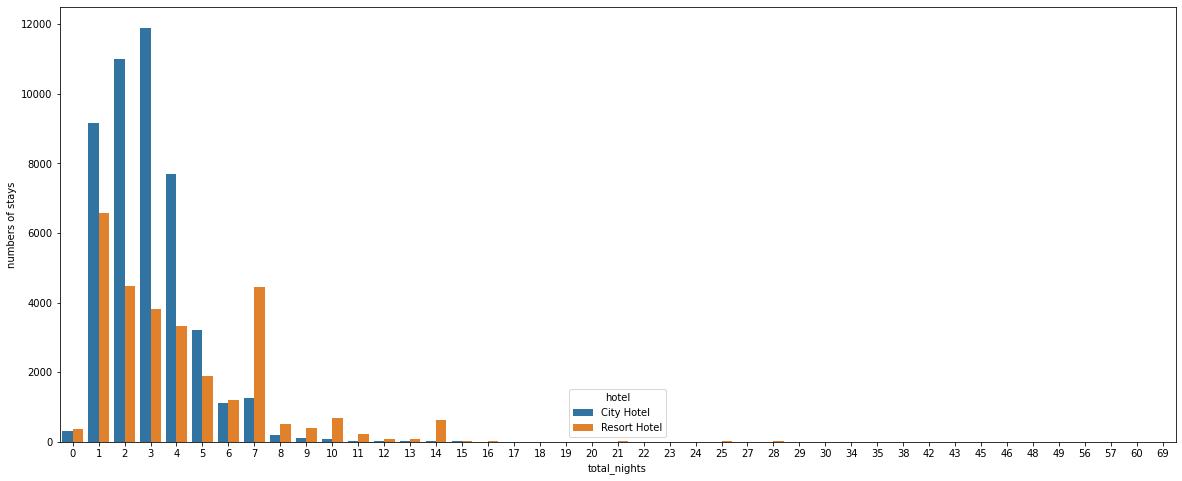

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x='total_nights', y='numbers of stays', hue='hotel', data=stay)

## Other useful analysis

<AxesSubplot:xlabel='market_segment', ylabel='adr'>

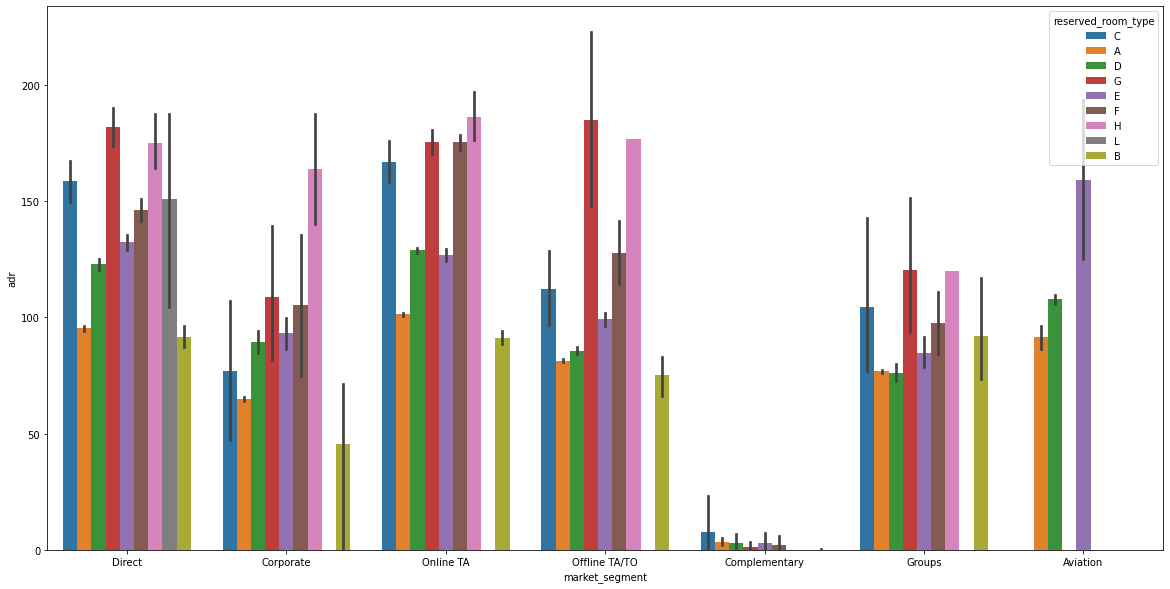

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment',y='adr', hue='reserved_room_type', data=data_process)

## Cancellations analysis

In [31]:
cancels = df[df['is_canceled'] == 1]
cancels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/2015


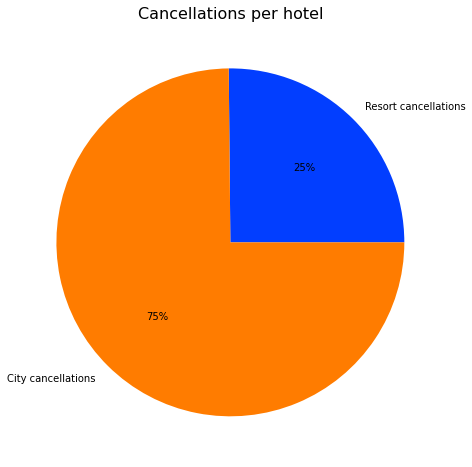

In [73]:
labels = ['Resort cancellations', 'City cancellations']
values = [len(cancels[cancels['hotel'] == 'Resort Hotel']), len(cancels[cancels['hotel'] == 'City Hotel'])]
colors = sns.color_palette('bright')
plt.figure(figsize=(12,8))
plt.title('Cancellations per hotel', fontsize=16)
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [33]:
country_data = cancels['country'].value_counts().reset_index()
country_data.columns = ['Country', 'Number of cancellations']
country_data

,Country,Number of cancellations
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
...,...,...
122,UMI,1
123,HND,1
124,FJI,1
125,SYC,1


In [34]:
px.choropleth(country_data, locations=country_data['Country'], color=country_data['Number of cancellations'],
              hover_name=country_data['Country'], title='Home country of cancellations')

In [35]:
resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)]
city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)]

In [36]:
cancellations_resort = resort['arrival_date_month'].value_counts().reset_index()
cancellations_resort.columns = ['month', 'number of cancellations']
cancellations_resort

,month,number of cancellations
0,August,1637
1,July,1436
2,April,1059
3,May,1024
4,June,1007
5,September,1006
6,October,978
7,February,795
8,March,763
9,December,631


In [37]:
cancellations_city = city['arrival_date_month'].value_counts().reset_index()
cancellations_city.columns = ['month', 'number of cancellations']
cancellations_city

,month,number of cancellations
0,May,3653
1,August,3602
2,June,3528
3,April,3465
4,July,3306
5,October,3268
6,September,3110
7,March,2386
8,February,1901
9,December,1740


In [38]:
final_cancellations = cancellations_city.merge(cancellations_resort, on='month')
final_cancellations.columns= ['month', 'number of cancellations in city', 'number of cancellations in resort']
final_cancellations

,month,number of cancellations in city,number of cancellations in resort
0,May,3653,1024
1,August,3602,1637
2,June,3528,1007
3,April,3465,1059
4,July,3306,1436
5,October,3268,978
6,September,3110,1006
7,March,2386,763
8,February,1901,795
9,December,1740,631


In [69]:
final_cancellations = sd.Sort_Dataframeby_Month(final_cancellations, 'month')
final_cancellations

,month,number of cancellations in city,number of cancellations in resort
0,January,1482,325
1,February,1901,795
2,March,2386,763
3,April,3465,1059
4,May,3653,1024
5,June,3528,1007
6,July,3306,1436
7,August,3602,1637
8,September,3110,1006
9,October,3268,978


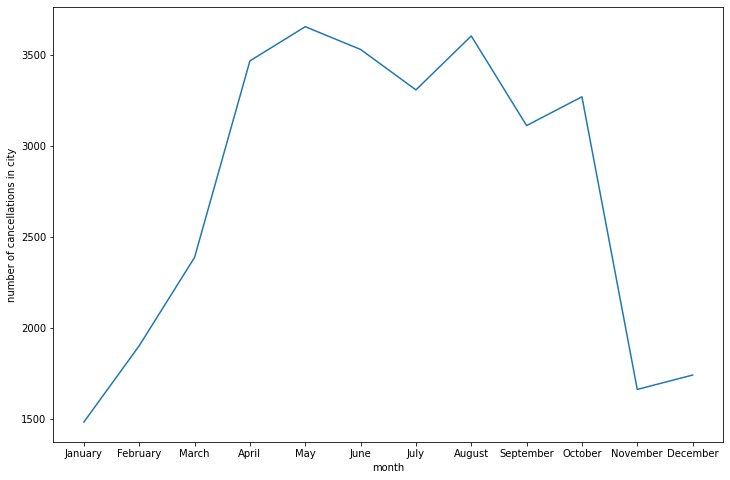

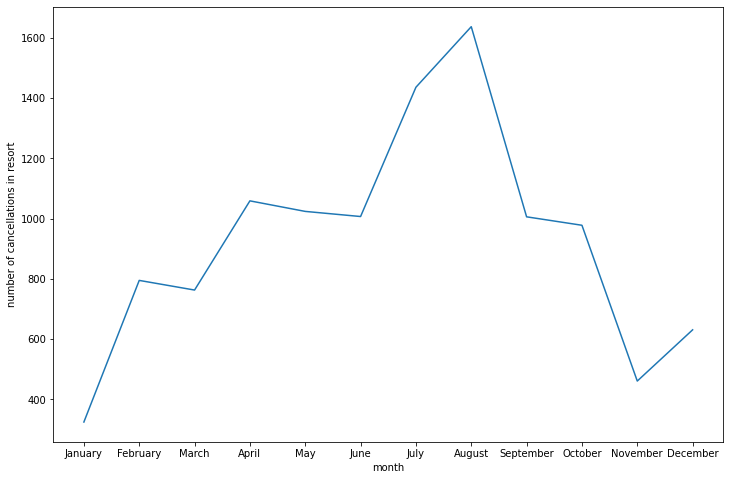

In [72]:
plt.figure(figsize=(12,8))
sns.lineplot(x = "month", y = 'number of cancellations in city', data = final_cancellations)
plt.show()
plt.figure(figsize=(12,8))
sns.lineplot(x = "month", y = 'number of cancellations in resort', data = final_cancellations)
plt.show()

In [1]:
print('Finish analysis')

Finish analysis
